In [1]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from molvs import standardize_smiles
from rdkit.Chem import PandasTools

class RDKit_2D:
    def __init__(self, smiles):
        self.mols = [Chem.MolFromSmiles(i) for i in smiles]
        self.smiles = smiles
        
    def compute_2Drdkit(self):
        rdkit_2d_desc = []
        calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
        header = calc.GetDescriptorNames()
        for i in range(len(self.mols)):
            ds = calc.CalcDescriptors(self.mols[i])
            rdkit_2d_desc.append(ds)
        df = pd.DataFrame(rdkit_2d_desc,columns=header)
        df.insert(loc=0, column='Smiles', value=self.smiles)
        df.to_csv('RDKit_2D_features.csv', index=False)
        
        
df = PandasTools.LoadSDF('/home/javad/Desktop/rdKit/ML/Machine-learning-meets-pKa-master/datasets/combined_training_datasets_unique.sdf')               # read the csv file as pandas data frame
pd.set_option('max_columns', None)



,pKa,marvin_pKa,marvin_atom,marvin_pKa_type,original_dataset,ID,ROMol,New_pKa
0,6.21,6.09,10,basic,['chembl25'],1702768,,6.21
1,7.46,8.2,9,basic,['chembl25'],273537,,7.46
2,4.2,3.94,9,basic,['datawarrior'],7175,,4.20
3,3.73,5.91,8,acidic,['datawarrior'],998,,3.73
4,11.0,8.94,13,basic,['chembl25'],560562,,11.00

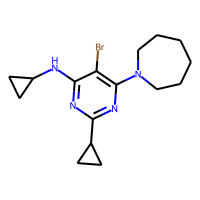
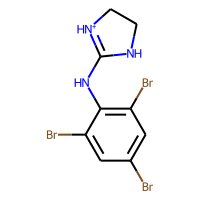
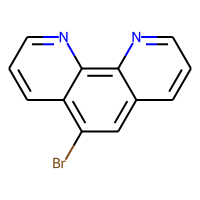
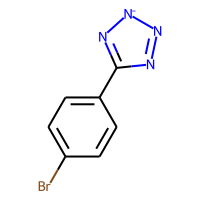
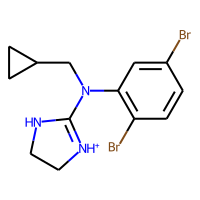

In [2]:
df["New_pKa"]=[float(i)  for i in df["pKa"].values]
df.head()

In [3]:
rdkit_2d_desc = []
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
header = calc.GetDescriptorNames()

for i in range(len(df)):
    ds = calc.CalcDescriptors(df["ROMol"][i])
    rdkit_2d_desc.append(ds)
    
df_features = pd.DataFrame(rdkit_2d_desc,columns=header)

        

In [50]:
#df_features.head()
df_final=pd.concat([df_features,df["New_pKa"]],axis=1)
df_final.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,New_pKa
0,4.915924,0.600538,4.915924,0.600538,0.887847,351.292,328.108,350.110609,114,0,0.148393,-0.366224,0.366224,0.148393,0.952381,1.666667,2.285714,79.918731,10.209864,2.307789,-2.240870,2.419427,-2.261462,9.104339,0.725646,1.666954,517.253416,14.233840,12.445374,14.031370,10.309663,8.399815,9.192813,6.662148,7.455146,4.617317,5.347526,2.984894,3.527441,-0.84,208199.957163,13.797628,5.746430,3.174160,134.409754,10.216698,21.932850,0.0,0.0,0.0,0.000000,0.000000,9.967957,0.0,0.0,12.841643,54.454874,25.049260,0.000000,0.000000,27.565669,0.0,9.967957,0.000000,63.326320,23.306211,10.297124,0.0,0.000000,10.216698,11.635726,0.0,15.929944,29.099311,0.0,0.000000,63.108884,4.472720,0.0,0.000000,0.0,41.05,0.0,0.0,0.0,0.0,11.959747,35.022362,51.366573,0.000000,0.000000,26.146642,9.967957,1.070093,3.773106,12.174570,3.577645,0.000000,3.800718,0.625219,10.306847,2.255136,0.0,0.750000,21,1,4,2,1,3,0,1,1,4,1,5,4,2,1,3,4,4.0712,89.0327,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.21
1,3.513821,0.943262,3.513821,0.943262,0.669216,398.904,389.832,395.834110,80,0,0.348162,-0.274503,0.348162,0.274503,1.200000,1.866667,2.400000,79.920796,10.301445,2.161528,-2.056800,2.335335,-2.719594,9.113948,-0.444067,2.271813,394.058751,10.836499,7.702808,12.460797,7.164704,4.428754,6.807749,3.097988,5.722338,1.985433,3.694107,1.312506,3.769434,-0.07,3583.261130,11.416434,4.842514,2.733753,113.118088,0.000000,5.

smiles = [standardize_smiles(i) for i in df['Smiles'].values]  

# Compute RDKit_2D Fingerprints and export a csv file.
RDKit_descriptor = RDKit_2D(smiles)        # create your RDKit_2D object and provide smiles
RDKit_descriptor.compute_2Drdkit() # compute RDKit_2D and provide the name of your desired output file. you can use the same name as the input file because the RDKit_2D class will ensure to add "_RDKit_2D.csv" as part of the output file.


In [51]:
# drop NAN values in the feature matrix
is_NaN = df_final.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_final[row_has_NaN]

df_final.drop(index=rows_with_NaN.index,inplace=True)


#bad data [16,17]
#[75,69] structure not math name 

DF=pd.read_csv("RDKit_2D_features.csv")
mol_strc=[Chem.MolFromSmiles(i) for i in df["Smiles"].values]

pKa=[i for i in df["CX Basic pKa"].values]
DF["structure"]=mol_strc
DF["pKa"]=pKa
DF.index = DF.index + 1


import seaborn as sns
import matplotlib as plt
%matplotlib inline
import numpy as np


DF.head()


import rdkit

molecular_structure=[Chem.MolFromSmiles(i) for i in DF["smiles"].values]


N_tertiary=[rdkit.Chem.Fragments.fr_NH0(i) for i in molecular_structure]
N_primary=[rdkit.Chem.Fragments.fr_NH1(i) for i in molecular_structure]
N_secondary=[rdkit.Chem.Fragments.fr_NH2(i) for i in molecular_structure]

ONLY_tertiary=np.array([1,0,0])


N=np.array([N_tertiary,N_primary,N_secondary])
j=0
for i in range(len(N)):
    if sum(N[:,i]==ONLY_tertiary)==3 :
        j+=1
        

my_list=[]
for i in range(len(N[0])):
    if sum(N[:,i]==ONLY_tertiary)==3 :
        my_list.append(i)
 
pd.set_option('max_colum', None)
DT=DF.iloc[my_list]
DF.corr().iloc[-1].sort_values(ascending=False)
        


In [52]:
#sns.pairplot(DT, x_vars="MolLogP", y_vars="pKa")
#DT.info()


In [53]:
from sklearn.model_selection import train_test_split

#sklearn takes numpy arrays

X=df_final.values[:,0:-1]
y=df_final.values[:,-1]

X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [54]:

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train1)
X_test=scaler.transform(X_test1)

#help(dense), #help(sequential)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


#model= Sequential([Dense(4,activation="relu"),Dense(5,activation="relu"),Dense(1,activation="relu")])
model=Sequential()
model.add(Dense(200,activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="linear"))

model.compile(optimizer='adam',loss='mse')


In [55]:
model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test),batch_size=128, epochs=400, verbose=1)


In [56]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [57]:
model.evaluate(X_train,y_train)



In [58]:
import seaborn as sns

y_predict=model.predict(X_test)

y_predict=pd.DataFrame(y_predict,columns=["y_predicted"])
y_true = pd.DataFrame(y_test,columns=["y_true"])

predict_true=pd.concat([y_predict,y_true],axis=1)
predict_true

sns.regplot(x="y_predicted",y="y_true", data=predict_true,color="g",scatter_kws={"color": "g"}, line_kws={"color": "g"})


In [2]:


df_amine= pd.read_csv("/home/javad/Desktop/rdKit/DATA2.csv")
molecular_structure=[Chem.MolFromSmiles(i) for i in df_amine["Smiles"].values]

rdkit_2d_desc = []
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
header = calc.GetDescriptorNames()

for i in range(len(df_amine)):
    ds = calc.CalcDescriptors(molecular_structure[i])
    rdkit_2d_desc.append(ds)
    
Feature_df_amine = pd.DataFrame(rdkit_2d_desc,columns=header)       




,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pKa
0,5.059028,0.718750,5.059028,0.718750,0.454512,74.127,64.047,74.084398,32,0,...,0,0,0,0,0,0,0,0,0,10.4
1,5.159028,0.775000,5.159028,0.775000,0.464599,88.154,76.058,88.100048,38,0,...,0,0,0,0,0,0,0,1,0,10.3
2,5.228472,0.805556,5.228472,0.805556,0.493575,102.181,88.069,102.115698,44,0,...,0,0,0,0,0,0,0,2,0,10.9
3,5.279493,0.823980,5.279493,0.823980,0.512739,116.208,100.080,116.131349,50,0,...,0,0,0,0,0,0,0,3,0,10.9
4,8.236111,-0.337963,8.236111,0.337963,0.433755,75.111,66.039,75.068414,32,0,...,0,0,0,0,0,0,0,0,0,9.5


In [61]:

# X_new=scaler.transform(df_final_test.values[:,0:-1])
# y_true=df_final_test.values[:,-1]

# y_predict=model.predict(X_new)
# y_predict=pd.DataFrame(y_predict,columns=["y_predicted"])
# y_true = pd.DataFrame(y_true,columns=["y_true"])

# predict_true=pd.concat([y_predict,y_true],axis=1)
# predict_true

# sns.regplot(x="y_predicted",y="y_true", data=predict_true,color="g",scatter_kws={"color": "g"}, line_kws={"color": "g"})


In [62]:
# model.evaluate(X_new,y_true)

In [63]:
df_final_test.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pKa
0,5.059028,0.718750,5.059028,0.718750,0.454512,74.127,64.047,74.084398,32,0,-0.006525,-0.330425,0.330425,0.006525,1.000000,1.400000,1.400000,14.572071,10.449932,1.672216,-1.806849,1.578637,-2.064198,4.332461,0.844010,2.190610,12.364528,4.121320,3.276021,3.276021,2.414214,1.816497,1.816497,0.930904,0.930904,0.408248,0.408248,0.117851,0.117851,-0.08,11.245112,4.92,3.920000,3.92,32.148917,11.467335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,19.510334,0.000000,0.000000,0.000000,0.0,0.0,0.0,11.467335,6.420822,13.089513,0.0,0.0,0.0,11.467335,0.0,0.0,0.0,13.089513,0.0,0.0,6.420822,0.0,0.0,0.0,0.0,52.04,0.0,0.0,0.0,0.000000,0.000000,19.510334,0.000000,0.000000,0.0,0.0,11.467335,0.0,0.0,0.0,0.000000,10.118056,0.0,0.0,0.944444,1.437500,0.0,1.0,5,4,2,0,0,0,0,0,0,2,2,2,2,0,0,0,0,-0.7061,22.7258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.4
1,5.159028,0.775000,5.159028,0.775000,0.464599,88.154,76.058,88.100048,38,0,-0.007680,-0.330473,0.330473,0.007680,0.833333,1.166667,1.333333,14.543172,10.312025,1.748758,-1.866287,1.767325,-2.034688,4.376847,0.755028,2.339092,17.509775,4.828427,3.983128,3.983128,2.914214,2.316497,2.316497,1.284457,1.284457,0.658248,0.658248,0.288675,0.288675,-0.08,20.986301,5.92,4.920000,3.92,38.513859,11.467335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,25.931156,0.000000,0.000000,0.000000,0.0,0.0,0.0,11.467335,12.841643,13.089513,0.0,0.0,0.0,11.467335,0.0,0.0,0.

In [6]:
 from sklearn.model_selection import train_test_split

X=df_final_test.values[:,0:-1]
y=df_final_test.values[:,-1]

X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train1)
X_test=scaler.transform(X_test1)

#help(dense), #help(sequential)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


#model= Sequential([Dense(4,activation="relu"),Dense(5,activation="relu"),Dense(1,activation="relu")])
model=Sequential()
model.add(Dense(50,activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(30,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="linear"))

model.compile(optimizer='adam',loss='mse')

        

/home/javad/anaconda3/envs/my-rdkit-test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/javad/anaconda3/envs/my-rdkit-test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/javad/anaconda3/envs/my-rdkit-test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/javad/anaconda3/envs/m

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test),batch_size=128, epochs=200, verbose=1)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60 samples, validate on 15 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
60/60 [==============================] - 0s 7ms/sample - loss: 97.5288 - val_loss: 87.4503
Epoch 2/200
60/60 [==============================] - 0s 194us/sample - loss: 89.9577 - val_loss: 80.2517
Epoch 3/200
60/60 [==============================] - 0s 123us/sample - loss: 81.1104 - val_loss: 72.7785
Epoch 4/200
60/60 [==============================] - 0s 134us/sample - loss: 74.4607 - val_loss: 64.8767
Epoch 5/200
60/60 [==============================] - 0s 332us/sample - loss: 65.3106 - val_loss: 56.3113
Epoch 6/200
60/60 [==============================] - 0s 248us/sample - loss: 55.8285 - val_loss: 47.4792
Epoch 7/200
60/60 [==============================] - 0s 282us/sample - loss: 46.5402 - val_loss: 38.7707
Epoch 8/200


60/60 [==============================] - 0s 400us/sample - loss: 3.0614 - val_loss: 2.5894
Epoch 71/200
60/60 [==============================] - 0s 198us/sample - loss: 2.5937 - val_loss: 2.6497
Epoch 72/200
60/60 [==============================] - 0s 193us/sample - loss: 3.2436 - val_loss: 2.7255
Epoch 73/200
60/60 [==============================] - 0s 269us/sample - loss: 2.2425 - val_loss: 2.8057
Epoch 74/200
60/60 [==============================] - 0s 192us/sample - loss: 3.7668 - val_loss: 2.8662
Epoch 75/200
60/60 [==============================] - 0s 326us/sample - loss: 2.8569 - val_loss: 2.9007
Epoch 76/200
60/60 [==============================] - 0s 355us/sample - loss: 4.4287 - val_loss: 2.9786
Epoch 77/200
60/60 [==============================] - 0s 258us/sample - loss: 2.3790 - val_loss: 3.0120
Epoch 78/200
60/60 [==============================] - 0s 319us/sample - loss: 4.1265 - val_loss: 2.9567
Epoch 79/200
60/60 [==============================] - 0s 398us/sample - loss:

Epoch 149/200
60/60 [==============================] - 0s 146us/sample - loss: 3.0331 - val_loss: 2.3556
Epoch 150/200
60/60 [==============================] - 0s 219us/sample - loss: 2.4592 - val_loss: 2.5147
Epoch 151/200
60/60 [==============================] - 0s 197us/sample - loss: 2.6693 - val_loss: 2.7298
Epoch 152/200
60/60 [==============================] - 0s 254us/sample - loss: 3.0409 - val_loss: 2.9161
Epoch 153/200
60/60 [==============================] - 0s 135us/sample - loss: 2.3368 - val_loss: 2.8776
Epoch 154/200
60/60 [==============================] - 0s 190us/sample - loss: 3.6331 - val_loss: 2.6823
Epoch 155/200
60/60 [==============================] - 0s 142us/sample - loss: 2.8528 - val_loss: 2.4403
Epoch 156/200
60/60 [==============================] - 0s 377us/sample - loss: 2.6783 - val_loss: 2.2599
Epoch 157/200
60/60 [==============================] - 0s 114us/sample - loss: 2.0640 - val_loss: 2.0937
Epoch 158/200
60/60 [==============================] - 

<AxesSubplot:>

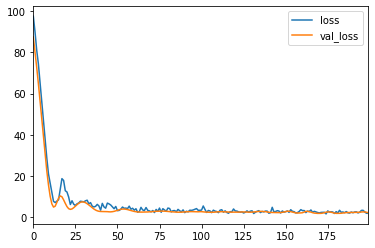

In [9]:
loss=pd.DataFrame(model.history.history)
loss.plot()

/home/javad/anaconda3/envs/my-rdkit-test/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<AxesSubplot:xlabel='y_predicted', ylabel='y_true'>

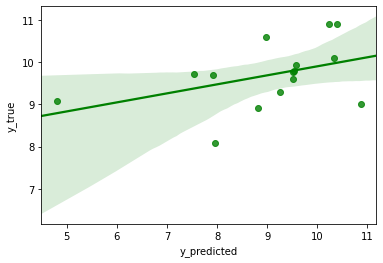

In [10]:
import seaborn as sns

y_predict=model.predict(X_test)

y_predict=pd.DataFrame(y_predict,columns=["y_predicted"])
y_true = pd.DataFrame(y_test,columns=["y_true"])

predict_true=pd.concat([y_predict,y_true],axis=1)
predict_true

sns.regplot(x="y_predicted",y="y_true", data=predict_true,color="g",scatter_kws={"color": "g"}, line_kws={"color": "g"})


In [12]:
model.evaluate(X_train,y_train)

60/60 [==============================] - 0s 190us/sample - loss: 0.3359


0.33587849934895836